<a href="https://colab.research.google.com/github/ChvscAkash/Music-Popularity-Prediction/blob/main/AIML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
print("✅ Libraries successfully imported.")

✅ Libraries successfully imported.


In [2]:
from google.colab import files
uploaded = files.upload()
print("✅ File uploaded successfully.")

Saving Spotify_data.csv to Spotify_data.csv
✅ File uploaded successfully.


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Spotify_data.csv']))
print("✅ Dataset loaded. Preview of the data:")
df.head()

✅ Dataset loaded. Preview of the data:


,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [4]:

df = df.drop(columns=['Unnamed: 0', 'Track Name', 'Artists', 'Album Name', 'Album ID', 'Track ID', 'External URLs'])

df['Release Year'] = pd.to_datetime(df['Release Date']).dt.year
df.drop(columns=['Release Date'], inplace=True)

df['Explicit'] = df['Explicit'].astype(int)

print("✅ Cleaned dataset preview:")
df.head()

✅ Cleaned dataset preview:


,Popularity,Duration (ms),Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Release Year
0,96,274192,1,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,2024
1,94,227239,1,0.936,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003,2024
2,91,140733,1,0.882,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113,2024
3,90,149668,0,0.681,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976,2024
4,89,144846,0,0.788,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019,2024


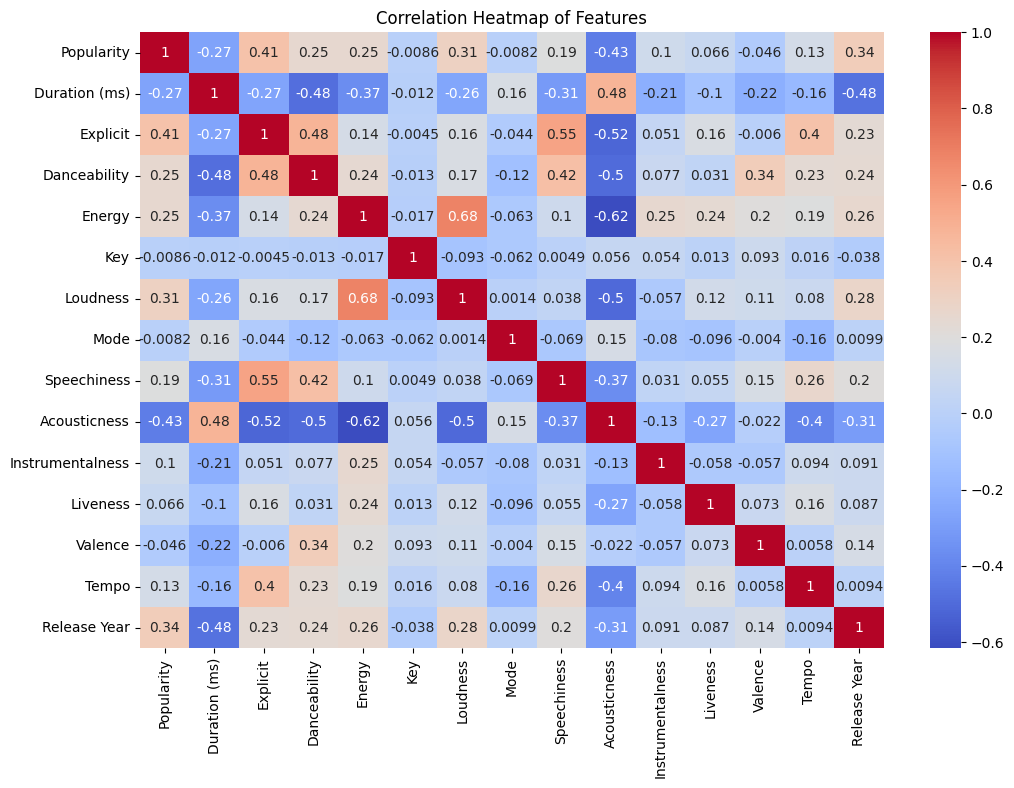

✅ Heatmap plotted.


In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()
print("✅ Heatmap plotted.")

In [6]:
X = df.drop(columns=['Popularity'])  # Independent features
y = df['Popularity']               # Target variable
print("✅ Features and target variable separated.")

✅ Features and target variable separated.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Data split completed. Training size: {len(X_train)}, Test size: {len(X_test)}")

✅ Data split completed. Training size: 181, Test size: 46


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Feature scaling completed using StandardScaler.")

✅ Feature scaling completed using StandardScaler.


In [9]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
print("✅ Model training completed.")

✅ Model training completed.


In [10]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 R² Score: {r2:.2f}")

📉 Mean Squared Error (MSE): 39.70
📈 R² Score: 0.40


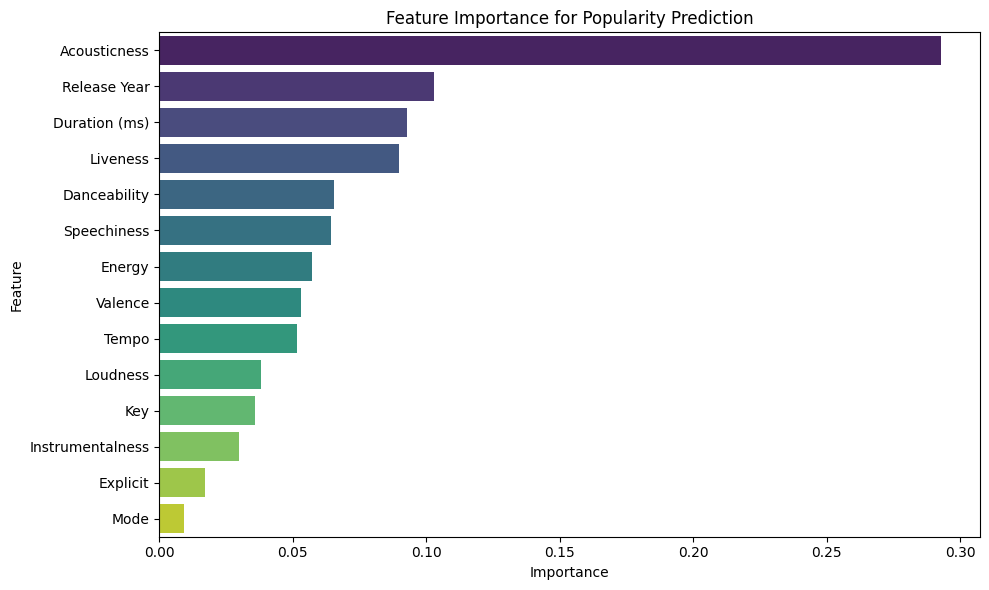

✅ Feature importance plotted.


In [11]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Popularity Prediction')
plt.tight_layout()
plt.show()

print("✅ Feature importance plotted.")